# Project: Wrangling and Analyze Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import requests
import os
import json

## Data Gathering

### Twitter-archive-enhanced.csv data 

In [2]:
df_arch = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
df_arch.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### Programmatical download of image-predictions.tsv data 

In [4]:
folder_name = 'tweet_image_predictions'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

In [5]:
url = ' https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

In [6]:
with open(os.path.join(folder_name, url.split('/')[-1]), mode = 'wb') as file:
        file.write(response.content)

#### Reading the image prediction data 

In [7]:
df_image= pd.read_csv('tweet_image_predictions\image-predictions.tsv', sep='\t')

In [8]:
df_image.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [ ]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_arch.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode="extended")
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except AttributeError:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [9]:
lst = []
with open('tweet-json.txt') as json_file:
    for line in json_file:
        tweet = json.loads(line)
        tweet_id = tweet['id']
        retweet_count = tweet['retweet_count']
        fav_count = tweet['favorite_count']
        lst.append({'tweet_id':tweet_id,
                    'retweet_count': retweet_count,
                    'favorite_count': fav_count})
df_twit_api = pd.DataFrame(lst)

In [10]:
df_twit_api.head()

,favorite_count,retweet_count,tweet_id
0,39467,8853,892420643555336193
1,33819,6514,892177421306343426
2,25461,4328,891815181378084864
3,42908,8964,891689557279858688
4,41048,9774,891327558926688256


## ASSESSING DATA

In [11]:
#Display info for twitter-archive-enhanced dataset
df_arch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [12]:
#Check the object type for timestamp
type(df_arch['timestamp'][0])

str

In [13]:
#Check the object type for retweeted_status_timestamp
type(df_arch['retweeted_status_timestamp'][0])

float

In [14]:
#Check for non null values of retweeted_status_timestamp to view the type of data entered
df_arch[df_arch['retweeted_status_timestamp'].notnull()]
#df_retweet_timestamp  

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
74,878316110768087041,NaN,NaN,2017-06-23 18:17:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Terrance. He's being yelle...,6.690004e+17,4.196984e+09,2015-11-24 03:51:38 +0000,https://twitter.com/dog_rates/status/669000397...,11,10,Terrance,None,None,None,None
78,877611172832227328,NaN,NaN,2017-06-21 19:36:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @rachel2195: @dog_rates the boyfriend and h...,8.768508e+17,5.128045e+08,2017-06-19 17:14:49 +0000,https://twitter.com/rachel2195/status/87685077...,14,10,None,None,None,pupper,None
91,874434818259525634,NaN,NaN,2017-06-13 01:14:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Coco. At first I though...,8.663350e+17,4.196984e+09,2017-05-21 16:48:45 +0000,https://twitter.com/dog_rates/status/866334964...,12,10,Coco,None,None,None,None
95,873697596434513921,NaN,NaN,2017-06-11 00:25:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Walter. He won't start ...,8.688804e+17,4.196984e+09,2017-05-28 17:23:24 +0000,https://twitter.com/dog_rates/status/868880397...,14,10,Walter,None,None,None,None
97,873337748698140672,NaN,NaN,2017-06-10 00:35:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Sierra. She's one preci...,8.732138e+17,4.196984e+09,2017-06-09 16:22:42 +0000,https://www.gofundme.com/help-my-baby-sierra-g...,12,10,Sierra,None,None,pupper,None


In [15]:
#view the describe statistics of the twitter-archive-enhanced dataframe
df_arch.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [16]:
#Display info for image-predictions dataset
df_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [17]:
#view the describe statistics of the image-predictions dataframe
df_image.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [18]:
#Number of unique values
df_image.nunique()

tweet_id    2075
jpg_url     2009
img_num        4
p1           378
p1_conf     2006
p1_dog         2
p2           405
p2_conf     2004
p2_dog         2
p3           408
p3_conf     2006
p3_dog         2
dtype: int64

In [19]:
#Display info for twitter API (json.txt) dataset
df_twit_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
favorite_count    2354 non-null int64
retweet_count     2354 non-null int64
tweet_id          2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


#### Validating dog stages  

In [20]:
#Check if All dog stages with values were correctly described

In [21]:
#Number of doggos
df_doggo = df_arch[df_arch.doggo != 'None']
df_doggo.count()['tweet_id']

97

In [22]:
#Confirm that the extracted dog stages from text column for doggo are the same
doggo_count=df_doggo['text'].str.lower().str.contains('doggo').sum()
if doggo_count>0:
    print ("There are {do} doggos".format(do=doggo_count))

There are 97 doggos


In [23]:
#Number of floofers
df_floofer = df_arch[df_arch.floofer != 'None']
df_floofer.count()['tweet_id']

10

In [24]:
#Confirm that the extracted dog stages from text column for floofer are the same
floofer_count=df_floofer['text'].str.lower().str.contains('floofer').sum()
if floofer_count>0:
    print ("There are {fl} floofers".format(fl=floofer_count))

There are 10 floofers


In [25]:
#Number of puppers
df_pupper = df_arch[df_arch.pupper != 'None']
df_pupper.count()['tweet_id']

257

In [26]:
#Confirm that the extracted dog stages from text column for pupper are the same
pupper_count=df_pupper['text'].str.lower().str.contains('pupper').sum()
if pupper_count>0:
    print ("There are {pu} puppers".format(pu=pupper_count))

There are 257 puppers


In [27]:
#Number of puppos
df_puppo = df_arch[df_arch.puppo != 'None']
df_puppo.count()['tweet_id']

30

In [28]:
#Confirm that the extracted dog stages from text column for puppo are the same
puppo_count=df_puppo['text'].str.lower().str.contains('puppo').sum()
if puppo_count>0:
    print ("There are {do} puppos".format(do=puppo_count))

There are 30 puppos


#### Validating dog stages where 'None' was recorded 

In [29]:
#Number of doggos with 'None' value  
df_doggo_none = df_arch[df_arch.doggo == 'None']
df_doggo_none.count()['tweet_id']

2259

In [30]:
#Confirm if the doggo dog stage was properly captured
doggo_none_count=df_doggo_none['text'].str.lower().str.contains('doggo').sum()
if doggo_none_count>0:
    print ("There are {do} doggos not captured".format(do=doggo_none_count))

There are 10 doggos not captured


In [31]:
#Display the doggos not properly captured
doggo_none_count = df_doggo_none[df_doggo_none['text'].str.lower().str.contains('doggo')]
doggo_none_count

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
83,876537666061221889,NaN,NaN,2017-06-18 20:30:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I can say with the pupmost confidence that the...,NaN,NaN,NaN,https://twitter.com/mpstowerham/status/8761629...,14,10,None,None,None,None,None
268,841439858740625411,NaN,NaN,2017-03-14 00:04:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have some incredible doggos for #K9Vet...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/841439858...,14,10,None,None,None,None,None
302,836648853927522308,NaN,NaN,2017-02-28 18:46:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @SchafeBacon2016: @dog_rates Slightly distu...,8.366481e+17,7.124572e+17,2017-02-28 18:43:57 +0000,https://twitter.com/SchafeBacon2016/status/836...,11,10,None,None,None,None,None
475,816062466425819140,NaN,NaN,2017-01-02 23:23:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Jack. He's one of the rare...,8.159907e+17,4.196984e+09,2017-01-02 18:38:42 +0000,https://www.gofundme.com/surgeryforjacktheminp...,11,10,Jack,None,None,None,None
477,815990720817401858,NaN,NaN,2017-01-02 18:38:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jack. He's one of the rare doggos that do...,NaN,NaN,NaN,https://www.gofundme.com/surgeryforjacktheminp...,11,10,Jack,None,None,None,None
798,772877495989305348,NaN,NaN,2016-09-05 19:22:09 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",You need to watch these two doggos argue throu...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/772877495...,11,10,None,None,None,None,None
934,753420520834629632,NaN,NaN,2016-07-14 02:47:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we are witnessing an isolated squad of bo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/753420520...,11,10,None,None,None,None,None
946,752568224206688256,NaN,NaN,2016-07-11 18:20:21 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Here are three doggos completely misjudging an...,NaN,NaN,NaN,https://vine.co/v/5W0bdhEUUVT,9,10,None,None,None,None,None
987,749036806121881602,NaN,NaN,2016-07-02 00:27:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Dietrich. He hops at random. Other dog...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749036806...,8,10,Dietrich,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None


In [32]:
#Display the text columns for some of the doggos that wern't properly captured for confirmation
[df_arch.iloc[934].text,df_arch.iloc[798].text, 
 df_arch.iloc[268].text,df_arch.iloc[477].text,
 df_arch.iloc[1120].text]

['Here we are witnessing an isolated squad of bouncing doggos. Unbelievably rare for this time of year. 11/10 for all https://t.co/CCdlwiTwQf',
 'You need to watch these two doggos argue through a cat door. Both 11/10 https://t.co/qEP31epKEV',
 'Here we have some incredible doggos for #K9VeteransDay. All brave as h*ck. Salute your dog in solidarity. 14/10 for all https://t.co/SVNMdFqKDL',
 "Meet Jack. He's one of the rare doggos that doesn't mind baths. 11/10 click the link to see how you can help Jack!\n\nhttps://t.co/r4W111FzAq https://t.co/fQpYuMKG3p",
 'Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv']

In [33]:
#Number of floofers with 'None' value  
df_floofer_none = df_arch[df_arch.floofer == 'None']
df_floofer_none.count()['tweet_id']

2346

In [34]:
#Confirm if the floofer dog stage was properly captured
floofer_none_count=df_floofer_none['text'].str.lower().str.contains('floofer').sum()
if floofer_none_count>0:
    print ("There are {do} floofers not captured".format(do=floofer_none_count))

In [35]:
#Display the floofers not properly captured
floofer_none_count = df_floofer_none[df_floofer_none['text'].str.lower().str.contains('floofer')]
floofer_none_count

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [36]:
#Number of puppers with 'None' value   
df_pupper_none = df_arch[df_arch.pupper == 'None']
df_pupper_none.count()['tweet_id']

2099

In [37]:
#Confirm if the pupper dog stage was properly captured
pupper_none_count=df_pupper_none['text'].str.lower().str.contains('pupper').sum()
if pupper_none_count>0:
    print ("There are {do} puppers not captured".format(do=pupper_none_count))

There are 26 puppers not captured


In [38]:
#Display the puppers not properly captured
pupper_none_count = df_pupper_none[df_pupper_none['text'].str.lower().str.contains('pupper')]
pupper_none_count

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
54,881666595344535552,NaN,NaN,2017-07-03 00:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Gary. He couldn't miss this puppertuni...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881666595...,13,10,Gary,None,None,None,None
536,807010152071229440,NaN,NaN,2016-12-08 23:53:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Lennon. He's a Boopershnoop Pupperdoop...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/807010152...,12,10,Lennon,None,None,None,None
993,748575535303884801,NaN,NaN,2016-06-30 17:54:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is one of the most reckless puppers I've ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/748575535...,6,10,one,None,None,None,None
1027,746056683365994496,NaN,NaN,2016-06-23 19:05:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Arlen and Thumpelina. They are best pa...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/746056683...,11,10,Arlen,None,None,None,None
1093,737310737551491075,NaN,NaN,2016-05-30 15:52:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Everybody stop what you're doing and watch the...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/737310737...,13,10,None,None,None,None,None
1220,714606013974974464,NaN,NaN,2016-03-29 00:12:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here are two lil cuddly puppers. Both 12/10 wo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/714606013...,12,10,None,None,None,None,None
1228,713900603437621249,NaN,NaN,2016-03-27 01:29:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy Saturday here's 9 puppers on a bench. 99...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/713900603...,99,90,None,None,None,None,None
1254,710658690886586372,NaN,NaN,2016-03-18 02:46:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a brigade of puppers. All look very pre...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/710658690...,80,80,None,None,None,None,None
1265,709901256215666688,NaN,NaN,2016-03-16 00:37:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",WeRateDogs stickers are here and they're 12/10...,NaN,NaN,NaN,"http://goo.gl/ArWZfi,https://twitter.com/dog_r...",12,10,None,None,None,None,None
1351,704054845121142784,NaN,NaN,2016-02-28 21:25:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a whole flock of puppers. 60/50 I'll ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/704054845...,60,50,a,None,None,None,None


In [39]:
#Display the text columns for some of the puppers that wern't properly captured for confirmation
[df_arch.iloc[54].text,df_arch.iloc[1862].text]

["This is Gary. He couldn't miss this puppertunity for a selfie. Flawless focusing skills. 13/10 would boop intensely https://t.co/7CSWCl8I6s",
 "Happy Friday. Here's some golden puppers. 12/10 for all https://t.co/wNkqAED6lG"]

In [40]:
#Number of puppos with 'None' value   
df_puppo_none = df_arch[df_arch.puppo == 'None']
df_puppo_none.count()['tweet_id']

2326

In [41]:
#Confirm if the puppo dog stage was properly captured
puppo_none_count=df_puppo_none['text'].str.lower().str.contains('puppo').sum()
if puppo_none_count>0:
    print ("There are {do} puppos not captured".format(do=puppo_none_count))

There are 8 puppos not captured


In [42]:
#Display the puppos not properly captured
puppo_none_count = df_puppo_none[df_puppo_none['text'].str.lower().str.contains('puppo')]
puppo_none_count

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
85,876120275196170240,NaN,NaN,2017-06-17 16:52:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Meet Venti, a seemingly caffeinated puppoccino...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/876120275...,13,10,Venti,None,None,None,None
106,871879754684805121,NaN,NaN,2017-06-06 00:01:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Lassie. She's celebrating #PrideM...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/871879754...,13,10,Lassie,None,None,None,None
134,866686824827068416,NaN,NaN,2017-05-22 16:06:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Lili. She can't believe you betrayed h...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/866686824...,12,10,Lili,None,None,None,None
172,858843525470990336,NaN,NaN,2017-05-01 00:40:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I have stumbled puppon a doggo painting party....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/858843525...,13,10,None,doggo,None,None,None
228,848213670039564288,8.482121e+17,4.196984e+09,2017-04-01 16:41:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Jerry just apuppologized to me. He said there ...,NaN,NaN,NaN,NaN,11,10,None,None,None,None,None
274,840698636975636481,8.406983e+17,8.405479e+17,2017-03-11 22:59:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@0_kelvin_0 &gt;10/10 is reserved for puppos s...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
296,837366284874571778,NaN,NaN,2017-03-02 18:17:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Lucy. She has a portrait of herself on...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/837366284...,13,10,Lucy,None,None,None,None
545,805826884734976000,NaN,NaN,2016-12-05 17:31:15 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Duke. He is not a fan of the pupporazz...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/805826884...,12,10,Duke,None,None,None,None


In [43]:
#Display the text columns for some of the puppos that wern't properly captured for confirmation
[df_arch.iloc[545].text,df_arch.iloc[85].text,
 df_arch.iloc[134].text,df_arch.iloc[296].text,
 df_arch.iloc[228].text]

['This is Duke. He is not a fan of the pupporazzi. 12/10 https://t.co/SgpBVYIL18',
 'Meet Venti, a seemingly caffeinated puppoccino. She was just informed the weekend would include walks, pats and scritches. 13/10 much excite https://t.co/ejExJFq3ek',
 "This is Lili. She can't believe you betrayed her with bath time. Never looking you in the eye again. 12/10 would puppologize profusely https://t.co/9b9J46E86Z",
 'This is Lucy. She has a portrait of herself on her ear. Excellent for identification pupposes. 13/10 innovative af https://t.co/uNmxbL2lns',
 'Jerry just apuppologized to me. He said there was no ill-intent to the slippage. I overreacted I admit. Pupgraded to an 11/10 would pet']

#### Validating dog names 

In [44]:
#Display the first 10 rows to view the names
df_arch.head(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [45]:
#Display the last 10 rows to view the names
df_arch.tail(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2346,666058600524156928,NaN,NaN,2015-11-16 01:01:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is the Rand Paul of retrievers folks! He'...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666058600...,8,10,the,None,None,None,None
2347,666057090499244032,NaN,NaN,2015-11-16 00:55:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",My oh my. This is a rare blond Canadian terrie...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666057090...,9,10,a,None,None,None,None
2348,666055525042405380,NaN,NaN,2015-11-16 00:49:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a Siberian heavily armored polar bear ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666055525...,10,10,a,None,None,None,None
2349,666051853826850816,NaN,NaN,2015-11-16 00:35:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an odd dog. Hard on the outside but lo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666051853...,2,10,an,None,None,None,None
2350,666050758794694657,NaN,NaN,2015-11-16 00:30:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a truly beautiful English Wilson Staff...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666050758...,10,10,a,None,None,None,None
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [46]:
df_arch.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Lilly', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella',
       'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey',
       'Gary', 'a', 'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey',
       'Duddles', 'Jack', 'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow',
       'Terrance', 'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict',
       'Venti', 'Goose', 'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian',
       'Walter', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Dawn', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'quite', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold', 'Shikha',
       'Jamesy', 'Lili', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Nept

In [47]:
#Names that sound a bit strange to me displayed from the unique values of name are- 'actually','unacceptable','all',
#'old','infuriating','Cupcake','Eazy','Trip','Ulysses','by','life','space','a','the','quite','one','not','O','my','Al','just'
#'Tiger','light','his','an','this', and 'None'.

#Confirm the names that sound a bit strange to me
[df_arch.query('name =="actually"').text, df_arch.query('name =="unacceptable"').text,
df_arch.query('name =="all"').text, df_arch.query('name =="old"').text,
df_arch.query('name =="infuriating"').text, df_arch.query('name =="Cupcake"').text,
df_arch.query('name =="Eazy"').text, df_arch.query('name =="Trip"').text,
df_arch.query('name =="Ulysses"').text, df_arch.query('name =="by"').text,
df_arch.query('name =="life"').text, df_arch.query('name =="space"').text,
df_arch.query('name =="a"').text, df_arch.query('name =="the"').text,
 df_arch.query('name =="quite"').text, df_arch.query('name =="one"').text,
 df_arch.query('name =="not"').text, df_arch.query('name =="O"').text,
 df_arch.query('name =="my"').text, df_arch.query('name =="Al"').text,
 df_arch.query('name =="just"').text, df_arch.query('name =="Tiger"').text,
 df_arch.query('name =="light"').text, df_arch.query('name =="his"').text,
 df_arch.query('name =="an"').text, df_arch.query('name =="this"').text]


[1040    This is actually a pupper and I'd pet it so we...
 1693    This is actually a lion. We only rate dogs. Fo...
 Name: text, dtype: object,
 1121    We only rate dogs. Pls stop sending non-canine...
 Name: text, dtype: object,
 1138    This is all I want in my life. 12/10 for super...
 Name: text, dtype: object,
 1206    This is old now but it's absolutely heckin fan...
 Name: text, dtype: object,
 1259    We 👏🏻 only 👏🏻 rate 👏🏻 dogs. Pls stop sending i...
 Name: text, dtype: object,
 1309    Say hello to Cupcake. She's an Icelandic Dippe...
 2275    Meet Cupcake. I would do unspeakable things fo...
 Name: text, dtype: object,
 1392    This is Eazy-E. He's colorful af. Must be rare...
 Name: text, dtype: object,
 1551    Meet Trip. He likes wearing costumes that aren...
 Name: text, dtype: object,
 1679    This is Ulysses. He likes holding hands and hi...
 Name: text, dtype: object,
 1724    This is by far the most coordinated series of ...
 Name: text, dtype: object,
 1916    Thi

In [48]:
#View the text column where name = None
df_arch.query('name =="None"').text

5       Here we have a majestic great white breaching ...
7       When you watch your owner call another dog a g...
12      Here's a puppo that seems to be on the fence a...
24      You may not have known you needed to see this ...
25      This... is a Jubilant Antarctic House Bear. We...
30      @NonWhiteHat @MayhewMayhem omg hello tanner yo...
32      RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...
35      I have a new hero and his name is Howard. 14/1...
37      Here we have a corgi undercover as a malamute....
41      I present to you, Pup in Hat. Pup in Hat is gr...
42      OMG HE DIDN'T MEAN TO HE WAS JUST TRYING A LIT...
47      Please only send dogs. We don't rate mechanics...
55      @roushfenway These are good dogs but 17/10 is ...
59      Ugh not again. We only rate dogs. Please don't...
62      Please don't send in photos without dogs in th...
64                        @RealKentMurphy 14/10 confirmed
72      Martha is stunning how h*ckin dare you. 13/10 ...
78      RT @ra

In [49]:
#Sort the names
df_arch.name.sort_values

<bound method Series.sort_values of 0        Phineas
1          Tilly
2         Archie
3          Darla
4       Franklin
5           None
6            Jax
7           None
8           Zoey
9         Cassie
10          Koda
11         Bruno
12          None
13           Ted
14        Stuart
15        Oliver
16           Jim
17          Zeke
18       Ralphus
19        Canela
20        Gerald
21       Jeffrey
22          such
23        Canela
24          None
25          None
26          Maya
27        Mingus
28         Derek
29        Roscoe
          ...   
2326       quite
2327           a
2328        None
2329        None
2330        None
2331        None
2332        None
2333          an
2334           a
2335          an
2336        None
2337        None
2338        None
2339        None
2340        None
2341        None
2342        None
2343        None
2344        None
2345         the
2346         the
2347           a
2348           a
2349          an
2350           a
2351        

In [50]:
df_arch[df_arch.name == 'Jax']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
917,756939218950160384,NaN,NaN,2016-07-23 19:49:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jax. He is a majestic mountain pupper....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/756939218...,12,10,Jax,None,None,pupper,None
976,750026558547456000,NaN,NaN,2016-07-04 18:00:41 +0000,"<a href=""https://about.twitter.com/products/tw...",Meet Jax &amp; Jil. Jil is yelling the pledge ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/750026558...,10,10,Jax,None,None,None,None
1105,734912297295085568,NaN,NaN,2016-05-24 01:02:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jax. He's a literal fluffball. Sneaky ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/734912297...,10,10,Jax,None,None,None,None
1674,682259524040966145,NaN,NaN,2015-12-30 17:58:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He's an Iglesias Hufflepoof. Quite t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/682259524...,9,10,Jax,None,None,None,None
2045,671528761649688577,NaN,NaN,2015-12-01 03:18:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He's in the middle of a serious conv...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671528761...,10,10,Jax,None,None,None,None


#### Validating ratings 

In [51]:
#Check if rating_numerator has a null value
df_arch[df_arch.rating_numerator.isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [52]:
#Check if rating_denominator has a null value
df_arch[df_arch.rating_denominator.isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [53]:
df_arch.rating_numerator.unique()

array([  13,   12,   14,    5,   17,   11,   10,  420,  666,    6,   15,
        182,  960,    0,   75,    7,   84,    9,   24,    8,    1,   27,
          3,    4,  165, 1776,  204,   50,   99,   80,   45,   60,   44,
        143,  121,   20,   26,    2,  144,   88], dtype=int64)

In [54]:
df_arch.rating_denominator.unique()

array([ 10,   0,  15,  70,   7,  11, 150, 170,  20,  50,  90,  80,  40,
       130, 110,  16, 120,   2], dtype=int64)

In [55]:
#View the text for the last row of Jax
df_arch.iloc[2045].text

"Meet Jax. He's in the middle of a serious conversation and is trying unbelievably hard not to laugh. 10/10 https://t.co/HwiLcDPaCi"

In [56]:
#View another sample text
df_arch.iloc[45].text

'This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948'

In [57]:
#Confirm if 13.5 is included in the numerator rating
13.5 in df_arch.rating_numerator.unique()

False

In [58]:
#Confirm if 13.5 is included in the denominator rating
13.5 in df_arch.rating_denominator.unique()

False

In [59]:
#dataframe of 0 for rating_denominator
df_arch[df_arch['rating_denominator']==0]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None


In [60]:
#Check the text of dataframe of 0 for rating_denominator
df_arch.iloc[313]['text']

"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho"

In [61]:
#Since the rating of 0 for rating_denominator is not correct, check for all where rating_denominator is not equal to 10
df_arch[df_arch['rating_denominator']!=10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None


In [62]:
#View the text column to visually confirm the rating_denominator for those not equal to 10 
[df_arch.iloc[313].text, df_arch.iloc[342].text,
df_arch.iloc[433].text, df_arch.iloc[516].text,
df_arch.iloc[784].text, df_arch.iloc[902].text,
df_arch.iloc[1068].text, df_arch.iloc[1120].text,
df_arch.iloc[1165].text, df_arch.iloc[1202].text,
df_arch.iloc[1228].text, df_arch.iloc[1254].text,
df_arch.iloc[1274].text, df_arch.iloc[1351].text,
df_arch.iloc[1433].text, df_arch.iloc[1598].text,
df_arch.iloc[1634].text, df_arch.iloc[1635].text,
df_arch.iloc[1662].text, df_arch.iloc[1663].text,
df_arch.iloc[1779].text, df_arch.iloc[1843].text,
df_arch.iloc[2335].text]

["@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",
 '@docmisterio account started on 11/15/15',
 'The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd',
 'Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx',
 'RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…',
 'Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE',
 'After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ',
 'Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv',
 'Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a',
 'This

In [63]:
df_arch.iloc[342]

tweet_id                                                     832088576586297345
in_reply_to_status_id                                               8.32088e+17
in_reply_to_user_id                                                 3.05821e+07
timestamp                                             2017-02-16 04:45:50 +0000
source                        <a href="http://twitter.com/download/iphone" r...
text                                   @docmisterio account started on 11/15/15
retweeted_status_id                                                         NaN
retweeted_status_user_id                                                    NaN
retweeted_status_timestamp                                                  NaN
expanded_urls                                                               NaN
rating_numerator                                                             11
rating_denominator                                                           15
name                                    

In [64]:
df_arch.iloc[45]

tweet_id                                                     883482846933004288
in_reply_to_status_id                                                       NaN
in_reply_to_user_id                                                         NaN
timestamp                                             2017-07-08 00:28:19 +0000
source                        <a href="http://twitter.com/download/iphone" r...
text                          This is Bella. She hopes her smile made you sm...
retweeted_status_id                                                         NaN
retweeted_status_user_id                                                    NaN
retweeted_status_timestamp                                                  NaN
expanded_urls                 https://twitter.com/dog_rates/status/883482846...
rating_numerator                                                              5
rating_denominator                                                           10
name                                    

### Quality issues

**Twitter_archive_enhanced dataset**
1. Incorrect datatypes for timestamp column(str instead of timestamp) and rating_numerator column(int instead of float).   
2. Dog stages not properly captured, 10 doggos,26 puppers, and 8 puppos were not captured. 
3. 'None' values for unavailabe values for doggo, floofer, pupper, and puppo.      
4. Dog names Eazy, O, his, my,None(35), None(72) instead of Eazy-E, O'Malley,Quizno, Zoey, Howard, amd Martha. 
5. Dog names shouldn't be'actually','unacceptable','all','old','infuriating','by','life', 'space','a','the','quite', 'one','not','O','my','just','light','his','an','this', and 'None'. 
6. rating_numerator column not properly extracted from text column(only integer part extracted). 
7. Confusing ratings for both rating_numerator and rating_denominator from text column in index(313, 342, 516, 784,1068,1165, 1202, 1662, and 2335), multiple ratelike expressions like 'account started 11/15/15' at index[342], '9/11 search dog' at index[784, 1068], and 'she smiles 24/7' at index[516]). 

**image-predictions.tsv**
8. Complex column names.  

**Twitter_archive_enhanced dataset**
9. Retweets not needed.
10. Rows without images not needed.
11. Many irrelevant columns.




### Tidiness issues

1. doggo, floofer, pupper, and puppo columns in twitter-archive-enhanced dataset should be one column instead of 4. 
2. favorite_count and retweet_count columns in df_twit_api(json.txt) should be part of the Twitter_archive_enhanced dataset. 

# Cleaning Data

In [65]:
# Make copies of original pieces of data
df_archive= df_arch.copy()
df_img_pred = df_image.copy()
df_api = df_twit_api.copy()

### Quality issues 

### Issue #1: Incorrect datatypes for timestamp (str instead of timestamp). 

#### Define: Convert timestamp datatype to timestamp

#### Code 

In [66]:
df_archive['timestamp']= pd.to_datetime(df_archive['timestamp'])

#### Test

In [67]:
type(df_archive['timestamp'][0])

pandas._libs.tslibs.timestamps.Timestamp

### Issue #2: Dog stages not properly captured- 10 doggos, 26 puppers, and 8 puppos were not captured.

#### Define: Assign 'doggo', 'pupper', and 'puppo' respectively to the 10, 26, and 8 rows detected. 

#### Code : For doggo

In [68]:
#Number of doggos with 'None' value
dfc_doggo_none = df_archive[df_archive.doggo == 'None']
dfc_doggo_none.count()['tweet_id']

2259

In [69]:
#Display the doggos not properly captured
dfc_doggo_none_count = dfc_doggo_none[dfc_doggo_none['text'].str.lower().str.contains('doggo')]
dfc_doggo_none_count

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
83,876537666061221889,NaN,NaN,2017-06-18 20:30:39,"<a href=""http://twitter.com/download/iphone"" r...",I can say with the pupmost confidence that the...,NaN,NaN,NaN,https://twitter.com/mpstowerham/status/8761629...,14,10,None,None,None,None,None
268,841439858740625411,NaN,NaN,2017-03-14 00:04:30,"<a href=""http://twitter.com/download/iphone"" r...",Here we have some incredible doggos for #K9Vet...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/841439858...,14,10,None,None,None,None,None
302,836648853927522308,NaN,NaN,2017-02-28 18:46:45,"<a href=""http://twitter.com/download/iphone"" r...",RT @SchafeBacon2016: @dog_rates Slightly distu...,8.366481e+17,7.124572e+17,2017-02-28 18:43:57 +0000,https://twitter.com/SchafeBacon2016/status/836...,11,10,None,None,None,None,None
475,816062466425819140,NaN,NaN,2017-01-02 23:23:48,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Jack. He's one of the rare...,8.159907e+17,4.196984e+09,2017-01-02 18:38:42 +0000,https://www.gofundme.com/surgeryforjacktheminp...,11,10,Jack,None,None,None,None
477,815990720817401858,NaN,NaN,2017-01-02 18:38:42,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jack. He's one of the rare doggos that do...,NaN,NaN,NaN,https://www.gofundme.com/surgeryforjacktheminp...,11,10,Jack,None,None,None,None
798,772877495989305348,NaN,NaN,2016-09-05 19:22:09,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",You need to watch these two doggos argue throu...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/772877495...,11,10,None,None,None,None,None
934,753420520834629632,NaN,NaN,2016-07-14 02:47:04,"<a href=""http://twitter.com/download/iphone"" r...",Here we are witnessing an isolated squad of bo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/753420520...,11,10,None,None,None,None,None
946,752568224206688256,NaN,NaN,2016-07-11 18:20:21,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Here are three doggos completely misjudging an...,NaN,NaN,NaN,https://vine.co/v/5W0bdhEUUVT,9,10,None,None,None,None,None
987,749036806121881602,NaN,NaN,2016-07-02 00:27:45,"<a href=""http://twitter.com/download/iphone"" r...",This is Dietrich. He hops at random. Other dog...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749036806...,8,10,Dietrich,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None


In [70]:
#Array of the index of the omitted doggos
doggo_index = dfc_doggo_none_count.index
doggo_index

Int64Index([83, 268, 302, 475, 477, 798, 934, 946, 987, 1120], dtype='int64')

In [71]:
for item in doggo_index:
    df_archive.doggo[item] ='doggo'    

C:\Users\AMBROSE\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


#### Test : For doggo

In [72]:
#Confirm the change
[df_archive.doggo[83], df_archive.doggo[268]]

['doggo', 'doggo']

In [73]:
#This should be lower by 10(2259-10= 2249)
dfc_doggo_none = df_archive[df_archive.doggo == 'None']
dfc_doggo_none.count()['tweet_id']

2249

#### Code : For pupper 

In [74]:
#Number of puppers with 'None' value
dfc_pupper_none = df_archive[df_archive.pupper == 'None']
dfc_pupper_none.count()['tweet_id']

2099

In [75]:
#Display the puppers not properly captured
dfc_pupper_none_count = dfc_pupper_none[dfc_pupper_none['text'].str.lower().str.contains('pupper')]
dfc_pupper_none_count

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
54,881666595344535552,NaN,NaN,2017-07-03 00:11:11,"<a href=""http://twitter.com/download/iphone"" r...",This is Gary. He couldn't miss this puppertuni...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881666595...,13,10,Gary,None,None,None,None
536,807010152071229440,NaN,NaN,2016-12-08 23:53:08,"<a href=""http://twitter.com/download/iphone"" r...",This is Lennon. He's a Boopershnoop Pupperdoop...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/807010152...,12,10,Lennon,None,None,None,None
993,748575535303884801,NaN,NaN,2016-06-30 17:54:50,"<a href=""http://twitter.com/download/iphone"" r...",This is one of the most reckless puppers I've ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/748575535...,6,10,one,None,None,None,None
1027,746056683365994496,NaN,NaN,2016-06-23 19:05:49,"<a href=""http://twitter.com/download/iphone"" r...",This is Arlen and Thumpelina. They are best pa...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/746056683...,11,10,Arlen,None,None,None,None
1093,737310737551491075,NaN,NaN,2016-05-30 15:52:33,"<a href=""http://twitter.com/download/iphone"" r...",Everybody stop what you're doing and watch the...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/737310737...,13,10,None,None,None,None,None
1220,714606013974974464,NaN,NaN,2016-03-29 00:12:05,"<a href=""http://twitter.com/download/iphone"" r...",Here are two lil cuddly puppers. Both 12/10 wo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/714606013...,12,10,None,None,None,None,None
1228,713900603437621249,NaN,NaN,2016-03-27 01:29:02,"<a href=""http://twitter.com/download/iphone"" r...",Happy Saturday here's 9 puppers on a bench. 99...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/713900603...,99,90,None,None,None,None,None
1254,710658690886586372,NaN,NaN,2016-03-18 02:46:49,"<a href=""http://twitter.com/download/iphone"" r...",Here's a brigade of puppers. All look very pre...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/710658690...,80,80,None,None,None,None,None
1265,709901256215666688,NaN,NaN,2016-03-16 00:37:03,"<a href=""http://twitter.com/download/iphone"" r...",WeRateDogs stickers are here and they're 12/10...,NaN,NaN,NaN,"http://goo.gl/ArWZfi,https://twitter.com/dog_r...",12,10,None,None,None,None,None
1351,704054845121142784,NaN,NaN,2016-02-28 21:25:30,"<a href=""http://twitter.com/download/iphone"" r...",Here is a whole flock of puppers. 60/50 I'll ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/704054845...,60,50,a,None,None,None,None


In [76]:
#Array of the index of the omitted puppers
pupper_index = dfc_pupper_none_count.index
pupper_index

Int64Index([  54,  536,  993, 1027, 1093, 1220, 1228, 1254, 1265, 1351, 1516,
            1634, 1635, 1636, 1643, 1710, 1712, 1743, 1779, 1826, 1843, 1847,
            1862, 1900, 1928, 2141],
           dtype='int64')

In [77]:
for item1 in pupper_index:
    df_archive.pupper[item1] ='pupper'    

C:\Users\AMBROSE\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


#### Test : For pupper

In [78]:
#Confirm the change
[df_archive.pupper[54], df_archive.pupper[536]]

['pupper', 'pupper']

In [79]:
#This should be lower by 26(2099-26= 2073)
dfc_pupper_none = df_archive[df_archive.pupper == 'None']
dfc_pupper_none.count()['tweet_id']

2073

#### Code : For puppo 

In [80]:
#Number of puppos with 'None' value
dfc_puppo_none = df_archive[df_archive.puppo == 'None']
dfc_puppo_none.count()['tweet_id']

2326

In [81]:
#Display the puppos not properly captured
dfc_puppo_none_count = dfc_puppo_none[dfc_puppo_none['text'].str.lower().str.contains('puppo')]
dfc_puppo_none_count

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
85,876120275196170240,NaN,NaN,2017-06-17 16:52:05,"<a href=""http://twitter.com/download/iphone"" r...","Meet Venti, a seemingly caffeinated puppoccino...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/876120275...,13,10,Venti,None,None,None,None
106,871879754684805121,NaN,NaN,2017-06-06 00:01:46,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Lassie. She's celebrating #PrideM...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/871879754...,13,10,Lassie,None,None,None,None
134,866686824827068416,NaN,NaN,2017-05-22 16:06:55,"<a href=""http://twitter.com/download/iphone"" r...",This is Lili. She can't believe you betrayed h...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/866686824...,12,10,Lili,None,None,None,None
172,858843525470990336,NaN,NaN,2017-05-01 00:40:27,"<a href=""http://twitter.com/download/iphone"" r...",I have stumbled puppon a doggo painting party....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/858843525...,13,10,None,doggo,None,None,None
228,848213670039564288,8.482121e+17,4.196984e+09,2017-04-01 16:41:12,"<a href=""http://twitter.com/download/iphone"" r...",Jerry just apuppologized to me. He said there ...,NaN,NaN,NaN,NaN,11,10,None,None,None,None,None
274,840698636975636481,8.406983e+17,8.405479e+17,2017-03-11 22:59:09,"<a href=""http://twitter.com/download/iphone"" r...",@0_kelvin_0 &gt;10/10 is reserved for puppos s...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
296,837366284874571778,NaN,NaN,2017-03-02 18:17:34,"<a href=""http://twitter.com/download/iphone"" r...",This is Lucy. She has a portrait of herself on...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/837366284...,13,10,Lucy,None,None,None,None
545,805826884734976000,NaN,NaN,2016-12-05 17:31:15,"<a href=""http://twitter.com/download/iphone"" r...",This is Duke. He is not a fan of the pupporazz...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/805826884...,12,10,Duke,None,None,None,None


In [82]:
#Array of the index of the omitted puppos
puppo_index = dfc_puppo_none_count.index
puppo_index

Int64Index([85, 106, 134, 172, 228, 274, 296, 545], dtype='int64')

In [83]:
for item2 in puppo_index:
    df_archive.puppo[item2] ='puppo'    

C:\Users\AMBROSE\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


#### Test : For puppo

In [84]:
#Confirm the change
[df_archive.puppo[85], df_archive.puppo[106]]

['puppo', 'puppo']

In [85]:
#This should be lower by 8(2326-8= 2318)
dfc_puppo_none = df_archive[df_archive.puppo == 'None']
dfc_puppo_none.count()['tweet_id']

2318

### Issue #3: 'None' values for unavailabe values for doggo, floofer, pupper, and puppo instead on Nan.      

#### Define: Replace 'None' with Nan  for doggo, floofer, pupper, and puppo in twitter-archive-enhanced.csv (will be handled in Tidiness section)

#### Code :  

### Issue #4: Dog names 'Eazy', 'O', 'his', 'my', 'None(index 35),  None( index 72) instead of 'Eazy-E', "O'Malley", 'Quizno', 'Zoey', 'Howard', and 'Martha. 

#### Define: Replace them with the correct names

#### Code : 

In [86]:
df_archive.name = df_archive.name.replace('Eazy', 'Eazy-E')
df_archive.name = df_archive.name.replace('O', "O'Malley")
df_archive.name = df_archive.name.replace('his', 'Quizno')
df_archive.name = df_archive.name.replace('my', 'Zoey')

In [87]:
df_archive.name[35]= 'Howard'
df_archive.name[72]= 'Martha'

C:\Users\AMBROSE\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\AMBROSE\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


#### Test : 

In [88]:
df_archive[df_archive['name']== 'Eazy']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [89]:
df_archive[df_archive['name']== 'Eazy-E']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1392,700062718104104960,NaN,NaN,2016-02-17 21:02:13,"<a href=""http://twitter.com/download/iphone"" r...",This is Eazy-E. He's colorful af. Must be rare...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/700062718...,6,10,Eazy-E,None,None,None,None


In [90]:
df_archive[df_archive['name']== 'O']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [91]:
df_archive[df_archive['name']== "O'Malley"]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
775,776201521193218049,NaN,NaN,2016-09-14 23:30:38,"<a href=""http://twitter.com/download/iphone"" r...",This is O'Malley. That is how he sleeps. Doesn...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/776201521...,10,10,O'Malley,None,None,None,None


In [92]:
df_archive[df_archive['name']== 'his']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [93]:
df_archive[df_archive['name']== 'Quizno']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
992,748692773788876800,NaN,NaN,2016-07-01 01:40:41,"<a href=""http://twitter.com/download/iphone"" r...",That is Quizno. This is his beach. He does not...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/748692773...,10,10,Quizno,doggo,None,None,None


In [94]:
df_archive[df_archive['name']== 'my']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [95]:
df_archive[df_archive['name']== 'Zoey']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
115,870374049280663552,NaN,NaN,2017-06-01 20:18:38,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She really likes the planet. Wou...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/870374049...,13,10,Zoey,None,None,None,None
852,765395769549590528,NaN,NaN,2016-08-16 03:52:26,"<a href=""http://twitter.com/download/iphone"" r...",This is my dog. Her name is Zoey. She knows I'...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/765395769...,13,10,Zoey,None,None,None,None
2141,669993076832759809,NaN,NaN,2015-11-26 21:36:12,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. Her dreams of becoming a hippo b...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669993076...,9,10,Zoey,None,None,pupper,None


In [96]:
df_archive.name[35]

'Howard'

In [97]:
df_archive.name[72]

'Martha'

### Issue #5: Dog names shouldn't be 'actually', 'unacceptable', 'all', 'old', 'infuriating', 'by', 'life',  'space', 'a', 'the', 'quite', 'one', 'not', 'just', 'light', 'an', 'this', and 'None'.



#### Define:  Replace them with Nan

#### Code : 

In [101]:
unusual_names= ['actually', 'unacceptable', 'all', 'old', 'infuriating', 'by', 'life',  'space', 'a', 'the', 'quite', 
                'one', 'not', 'just', 'light', 'an', 'this', 'None']

for names in unusual_names:
    df_archive.name= df_archive.name.replace(names, np.nan) 

#### Test : 

In [102]:
unusual_names in df_archive.name.values

C:\Users\AMBROSE\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  """Entry point for launching an IPython kernel.


False

In [103]:
df_archive[df_archive['name']== "actually"]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Issue #6: rating_numerator column not properly extracted from text column(only integer part extracted). 

#### Define: Use regex to extract the correct rating_numerator 

#### Code : 

In [104]:
#Assign the text column to rate variable
rate = df_archive.text
rate[0:6]

0    This is Phineas. He's a mystical boy. Only eve...
1    This is Tilly. She's just checking pup on you....
2    This is Archie. He is a rare Norwegian Pouncin...
3    This is Darla. She commenced a snooze mid meal...
4    This is Franklin. He would like you to stop ca...
5    Here we have a majestic great white breaching ...
Name: text, dtype: object

In [105]:
#Use regex to extract the ratings from rate to form a new column called ratings
df_archive['ratings']= rate.str.extract(r"(?P<ratings>\d{1,2}[\.]?\d?\d?[\/]\d{1,2}\d?\d?)")
df_archive['ratings'][0:11]

0     13/10
1     13/10
2     12/10
3     13/10
4     12/10
5     13/10
6     13/10
7     13/10
8     13/10
9     14/10
10    13/10
Name: ratings, dtype: object

In [106]:
#View the a sample of the ratings(especially the 13.5) to confirm the correctness of the regex used
[df_archive['ratings'][979],df_archive['ratings'][1120],df_archive['ratings'][45]]

['1776/10', '204/170', '13.5/10']

In [107]:
#Check for nulls in the ratings column
df_archive[df_archive.ratings.isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,ratings


In [108]:
#Split the ratings column into 'confirm_numerator' and 'confirm_denominator' columns then drop the ratings column
df_archive[['confirm_numerator','confirm_denominator']]=df_archive.ratings.str.split('/', 1, expand=True)
df_archive = df_archive.drop('ratings', axis=1)

In [109]:
df_archive.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,confirm_numerator,confirm_denominator
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,13,10
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,13,10


In [110]:
df_archive.confirm_numerator.unique()

array(['13', '12', '14', '13.5', '17', '11', '10', '420', '666', '6',
       '15', '182', '960', '0', '9.75', '007', '84', '7', '9', '24', '8',
       '1', '5', '11.27', '3', '4', '165', '1776', '204', '50', '99',
       '80', '45', '60', '44', '143', '121', '20', '9.5', '11.26', '2',
       '144', '88'], dtype=object)

In [111]:
df_archive.confirm_denominator.unique()

array(['10', '00', '15', '70', '7', '11', '150', '170', '20', '50', '90',
       '80', '40', '130', '110', '16', '120', '2'], dtype=object)

In [112]:
#Change the confirm_numerator to float and confirm_denominator to int
df_archive.confirm_numerator= df_archive.confirm_numerator.astype(float)
df_archive.confirm_denominator= df_archive.confirm_denominator.astype(int)

In [113]:
#Rerun to confirm the change
df_archive.confirm_numerator.unique()

array([1.300e+01, 1.200e+01, 1.400e+01, 1.350e+01, 1.700e+01, 1.100e+01,
       1.000e+01, 4.200e+02, 6.660e+02, 6.000e+00, 1.500e+01, 1.820e+02,
       9.600e+02, 0.000e+00, 9.750e+00, 7.000e+00, 8.400e+01, 9.000e+00,
       2.400e+01, 8.000e+00, 1.000e+00, 5.000e+00, 1.127e+01, 3.000e+00,
       4.000e+00, 1.650e+02, 1.776e+03, 2.040e+02, 5.000e+01, 9.900e+01,
       8.000e+01, 4.500e+01, 6.000e+01, 4.400e+01, 1.430e+02, 1.210e+02,
       2.000e+01, 9.500e+00, 1.126e+01, 2.000e+00, 1.440e+02, 8.800e+01])

In [114]:
df_archive.rating_numerator.unique()

array([  13,   12,   14,    5,   17,   11,   10,  420,  666,    6,   15,
        182,  960,    0,   75,    7,   84,    9,   24,    8,    1,   27,
          3,    4,  165, 1776,  204,   50,   99,   80,   45,   60,   44,
        143,  121,   20,   26,    2,  144,   88], dtype=int64)

In [115]:
#View a sample of confirm_numerator
df_archive.confirm_numerator.sample(5)

1047    13.0
1618     5.0
326     13.0
282     13.0
28      13.0
Name: confirm_numerator, dtype: float64

In [116]:
#Check for rows where the rating_numerator is not the same as confirm_numerator
df_archive[df_archive.rating_numerator != df_archive.confirm_numerator]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,confirm_numerator,confirm_denominator
45,883482846933004288,NaN,NaN,2017-07-08 00:28:19,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She hopes her smile made you sm...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/883482846...,5,10,Bella,None,None,None,None,13.50,10
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: This is Logan, the Chow who liv...",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None,9.75,10
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None,9.75,10
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034...,27,10,Sophie,None,None,pupper,None,11.27,10
1689,681340665377193984,6.813394e+17,4.196984e+09,2015-12-28 05:07:27,"<a href=""http://twitter.com/download/iphone"" r...",I've been told there's a slight possibility he...,NaN,NaN,NaN,NaN,5,10,NaN,None,None,None,None,9.50,10
1712,680494726643068929,NaN,NaN,2015-12-25 21:06:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have uncovered an entire battalion of ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680494726...,26,10,NaN,None,None,pupper,None,11.26,10


In [117]:
#Crosscheck the exact rating from the text column displayed in the output of 
#df_arch[df_arch.rating_numerator != df_arch.confirm_numerator] above to 
#determine the correct column between rating_numerator and confirm_numerator 
[df_archive.iloc[45]['text'],
df_archive.iloc[340]['text'],
df_archive.iloc[695]['text'],
df_archive.iloc[763]['text'],
df_archive.iloc[1689]['text'],
df_archive.iloc[1712]['text']]

['This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948',
 "RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",
 "This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",
 "This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq",
 "I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace",
 'Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD']

In [118]:
#Since the above result shows that the confirm_numerator correctly extracted the ratings than the rating_numerator,
#assign the values of confirm_numerator to rating_numerator
df_archive.rating_numerator = df_archive.confirm_numerator
df_archive.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,confirm_numerator,confirm_denominator
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,None,None,None,None,13.0,10
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,None,None,None,None,13.0,10


In [119]:
#Check for rows where the rating_denominator is not the same as confirm_denominator
df_archive[df_archive.rating_denominator != df_archive.confirm_denominator]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,confirm_numerator,confirm_denominator


In [120]:
#Drop both confirm_numerator and confirm_denominator(they are now the same as rating_numerator and rating_denominator)
df_archive = df_archive.drop('confirm_numerator', axis=1)
df_archive = df_archive.drop('confirm_denominator', axis=1)

#### Test : 

In [121]:
#Confirm if the columns have been dropped
df_archive.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,None,None,None,None


In [122]:
#Confirm the change for float value
df_archive.iloc[45]

tweet_id                                                     883482846933004288
in_reply_to_status_id                                                       NaN
in_reply_to_user_id                                                         NaN
timestamp                                                   2017-07-08 00:28:19
source                        <a href="http://twitter.com/download/iphone" r...
text                          This is Bella. She hopes her smile made you sm...
retweeted_status_id                                                         NaN
retweeted_status_user_id                                                    NaN
retweeted_status_timestamp                                                  NaN
expanded_urls                 https://twitter.com/dog_rates/status/883482846...
rating_numerator                                                           13.5
rating_denominator                                                           10
name                                    

### Issue #7:  confusing ratings for both rating_numerator and rating_denominator from text column in index(313, 342, 516, 784,1068,1165, 1202, 1662, and 2335); multiple ratelike expressions like 'account started 11/15/15' at index[342], '9/11 search dog' at index[784, 1068], and 'she smiles 24/7' at index[516]. 

#### Define: Visually assess and replace them 

#### Code : 

In [123]:
df_archive.rating_numerator[313] = 13.0
df_archive.rating_denominator[313] = 10
df_archive.rating_numerator[342] = np.nan
df_archive.rating_denominator[342] = np.nan
df_archive.rating_numerator[516] = np.nan
df_archive.rating_denominator[516] = np.nan
df_archive.rating_numerator[784] = 14.0
df_archive.rating_denominator[784] = 10
df_archive.rating_numerator[1068] = 14.0
df_archive.rating_denominator[1068] = 10
df_archive.rating_numerator[1165] = 13.0
df_archive.rating_denominator[1165] = 10
df_archive.rating_numerator[1202] = 11.0
df_archive.rating_denominator[1202] = 10
df_archive.rating_numerator[1662] = 10.0
df_archive.rating_denominator[1662] = 10
df_archive.rating_numerator[2335] = 9.0
df_archive.rating_denominator[2335] = 10

C:\Users\AMBROSE\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\AMBROSE\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\AMBROSE\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\AMBR

#### Test : 

In [124]:
df_archive.rating_denominator[342]

nan

In [125]:
df_archive.rating_denominator[1662]

10.0

### Issue #8: complex column names in image-prediction.tsv 
 

#### Define: Rename the column names for better understanding

#### Code : 

In [128]:
df_img_pred = df_img_pred.rename(columns={'jpg_url' : 'image_url' ,
                                          'img_num' : 'image_number',
                                          'p1': 'prediction1',
                                          'p1_conf': 'prediction1_%confidence', 
                                          'p1_dog' : 'prediction1_dog',
                                          'p2': 'prediction2',
                                          'p2_conf': 'prediction2_%confidence',
                                          'p2_dog' : 'prediction2_dog',
                                          'p3': 'prediction3',
                                          'p3_conf': 'prediction3_%confidence',
                                          'p3_dog' : 'prediction3_dog'})

#### Test :

In [129]:
df_img_pred.columns

Index(['tweet_id', 'image_url', 'image_number', 'prediction1',
       'prediction1_%confidence', 'prediction1_dog', 'prediction2',
       'prediction2_%confidence', 'prediction2_dog', 'prediction3',
       'prediction3_%confidence', 'prediction3_dog'],
      dtype='object')

### Issue #9:  Retweets not needed 

#### Define: Drop rows that have retweet_status_id 

#### Code : 

In [130]:
#set df_archive to no retweets
df_archive = df_archive[df_archive['retweeted_status_id'].isnull()]
df_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13.0,10.0,NaN,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13.0,10.0,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13.0,10.0,NaN,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13.0,10.0,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14.0,10.0,Cassie,doggo,None,None,None


#### Test :  

In [131]:
df_archive[df_archive['retweeted_status_id'].notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Issue #10:  Rows without images not needed.


#### Define: Remove rows in twitter-archive-enhanced whose tweet_ids are not in image-predictions.tsv 

#### Code : 

In [132]:
#List of tweets to filter based on the images in image-prediction.tsv
tweets_to_filter = list(df_img_pred.tweet_id)
 
#Exclude the tweet_id rows not in image-prediction.tsv
df_archive = df_archive[df_archive.tweet_id.isin(tweets_to_filter)]

#### Test :  

In [133]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      1994 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     1994 non-null datetime64[ns]
source                        1994 non-null object
text                          1994 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1994 non-null object
rating_numerator              1993 non-null float64
rating_denominator            1993 non-null float64
name                          1361 non-null object
doggo                         1994 non-null object
floofer                       1994 non-null object
pupper                        1994 non-null object
puppo                         1994 non-null object
dtypes: datetime64[ns](1),

### Issue #11: Many irrelevant columns

#### Define:  Drop irrelevant columns

#### Code : 

In [134]:
#drop irrelevant columns
df_archive = df_archive.drop(['in_reply_to_status_id','in_reply_to_user_id', 'source', 'retweeted_status_id',
 'retweeted_status_user_id','retweeted_status_timestamp', 'expanded_urls'],axis=1)

#### Test :  

In [135]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 10 columns):
tweet_id              1994 non-null int64
timestamp             1994 non-null datetime64[ns]
text                  1994 non-null object
rating_numerator      1993 non-null float64
rating_denominator    1993 non-null float64
name                  1361 non-null object
doggo                 1994 non-null object
floofer               1994 non-null object
pupper                1994 non-null object
puppo                 1994 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(6)
memory usage: 171.4+ KB


### Tidiness issues  

### Issue #1: doggo, floofer, pupper, and puppo columns should be one column instead of 4. 

#### Define: Create dog stages column for the doggo, floofer, pupper, and puppo merged columns 

#### Code : 

In [136]:
df_archive.head(3)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,13.0,10.0,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,13.0,10.0,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,12.0,10.0,Archie,None,None,None,None


In [137]:
# replace 'None' with "" to be able to properly get the dog stage(to avoid getting NoneNoneNoneNone)
df_archive['doggo'] = df_archive['doggo'].replace('None','')
df_archive['floofer'] = df_archive['floofer'].replace('None','')
df_archive['pupper'] = df_archive['pupper'].replace('None','')
df_archive['puppo'] = df_archive['puppo'].replace('None','')

# Add the 4 columns into 1
df_archive['dog_stage'] = df_archive['doggo'] + df_archive['floofer'] + df_archive['pupper'] + df_archive['puppo']

In [138]:
df_archive.dog_stage.value_counts()

                1652
pupper           228
doggo             68
puppo             27
doggopupper        9
floofer            7
doggopuppo         2
doggofloofer       1
Name: dog_stage, dtype: int64

In [139]:
# replace "" with nan
df_archive['dog_stage'] = df_archive['dog_stage'].replace('', np.nan)

In [140]:
# drop the doggo, floofer, pupper, and puppo columns
df_archive = df_archive.drop(['doggo', 'floofer', 'pupper', 'puppo'],  axis=1)

#### Test : 

In [141]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 7 columns):
tweet_id              1994 non-null int64
timestamp             1994 non-null datetime64[ns]
text                  1994 non-null object
rating_numerator      1993 non-null float64
rating_denominator    1993 non-null float64
name                  1361 non-null object
dog_stage             342 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 124.6+ KB


In [142]:
df_archive.dog_stage.value_counts()

pupper          228
doggo            68
puppo            27
doggopupper       9
floofer           7
doggopuppo        2
doggofloofer      1
Name: dog_stage, dtype: int64

### Issue #2: favorite_count and retweet_count columns in json.txt should be part of the Twitter_archive_enhanced dataset. 

#### Define: Merge df_api and df_archive on tweet_id

#### Code : 

In [143]:
# Merge the df_archive dataframe with df_api dataframe
df_merged = pd.merge(df_archive, df_api, on='tweet_id', how='left')

#### Test : 

In [144]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 9 columns):
tweet_id              1994 non-null int64
timestamp             1994 non-null datetime64[ns]
text                  1994 non-null object
rating_numerator      1993 non-null float64
rating_denominator    1993 non-null float64
name                  1361 non-null object
dog_stage             342 non-null object
favorite_count        1994 non-null int64
retweet_count         1994 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(3), object(3)
memory usage: 155.8+ KB


In [145]:
df_merged.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage,favorite_count,retweet_count
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,13.0,10.0,Phineas,NaN,39467,8853
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,13.0,10.0,Tilly,NaN,33819,6514
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,12.0,10.0,Archie,NaN,25461,4328
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,13.0,10.0,Darla,NaN,42908,8964
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,12.0,10.0,Franklin,NaN,41048,9774


In [146]:
#Merge all the dataset (the previously merged one to the image_prediction)
df_merged = pd.merge(df_merged, df_img_pred, on='tweet_id', how='left')

In [147]:
df_merged.head(1)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage,favorite_count,retweet_count,image_url,image_number,prediction1,prediction1_%confidence,prediction1_dog,prediction2,prediction2_%confidence,prediction2_dog,prediction3,prediction3_%confidence,prediction3_dog
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,13.0,10.0,Phineas,NaN,39467,8853,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.07611,False


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [148]:
#Store the merged dataframe to "twitter_archive_master.csv"
df_merged.to_csv('twitter_archive_master.csv',index=False)

## Analyzing and Visualizing Data

In [149]:
#Read the master dataset
df_master = pd.read_csv('twitter_archive_master.csv')
df_master.head(3)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage,favorite_count,retweet_count,image_url,image_number,prediction1,prediction1_%confidence,prediction1_dog,prediction2,prediction2_%confidence,prediction2_dog,prediction3,prediction3_%confidence,prediction3_dog
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,13.0,10.0,Phineas,NaN,39467,8853,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,13.0,10.0,Tilly,NaN,33819,6514,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,12.0,10.0,Archie,NaN,25461,4328,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True


In [150]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 20 columns):
tweet_id                   1994 non-null int64
timestamp                  1994 non-null object
text                       1994 non-null object
rating_numerator           1993 non-null float64
rating_denominator         1993 non-null float64
name                       1361 non-null object
dog_stage                  342 non-null object
favorite_count             1994 non-null int64
retweet_count              1994 non-null int64
image_url                  1994 non-null object
image_number               1994 non-null int64
prediction1                1994 non-null object
prediction1_%confidence    1994 non-null float64
prediction1_dog            1994 non-null bool
prediction2                1994 non-null object
prediction2_%confidence    1994 non-null float64
prediction2_dog            1994 non-null bool
prediction3                1994 non-null object
prediction3_%confidence    1994 no

In [151]:
type(df_master['timestamp'][0])

str

In [152]:
df_master['timestamp']= pd.to_datetime(df_master['timestamp'])

In [153]:
type(df_master['timestamp'][0])

pandas._libs.tslibs.timestamps.Timestamp

### Insights:

1. Pupper dog stage has the highest frequency.

2. There is a positive correlation between favorite_count and retweet_count.

3. Of the 3 years in the dataset(2015, 2016, and 2017), 2016 has the highest frequency.

4. The favorite count increased as the year increased though their retweets dropped tremendously. 

### Visualization

In [154]:
#Value counts for dog stages
dog_percent= df_master.dog_stage.value_counts()
dog_percent

pupper          228
doggo            68
puppo            27
doggopupper       9
floofer           7
doggopuppo        2
doggofloofer      1
Name: dog_stage, dtype: int64

In [155]:
#Percentage function
def percentage(variable, total): 
    total= total
    #find the percentage and round it to 1 decimal place
    percent= round(((variable/total)*100), 1) 
    percent_age = str(percent)   # convert to string 
    print(percent_age)   

In [156]:
percentage(dog_percent,df_master.dog_stage.count()) 

pupper          66.7
doggo           19.9
puppo            7.9
doggopupper      2.6
floofer          2.0
doggopuppo       0.6
doggofloofer     0.3
Name: dog_stage, dtype: float64


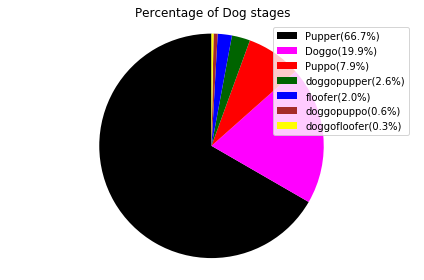

In [157]:
#Pie chart to show the dog stages
color= ("black", "magenta", "red","darkgreen", "blue", "brown", "yellow")
label= ['Pupper(66.7%)', 'Doggo(19.9%)', 'Puppo(7.9%)', 'doggopupper(2.6%)', 'floofer(2.0%)','doggopuppo(0.6%)','doggofloofer(0.3%)']
plt.pie(df_master['dog_stage'].value_counts(), 
        colors=color, startangle=90,
        #autopct='%1.1f%%',#the values are too tiny to see
        textprops={'fontsize':12,'color':'white'})
plt.title("Percentage of Dog stages")
plt.legend(labels=label, loc='upper right')
plt.axis('equal')
plt.tight_layout()
plt.show;

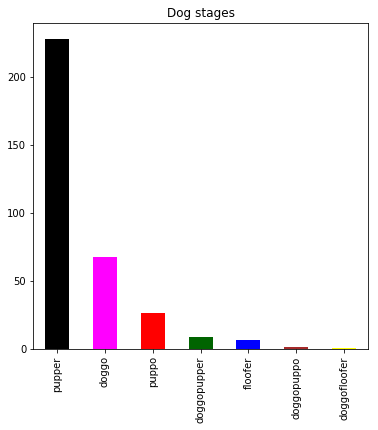

In [158]:
#Bar chart for dog stages
color= ("black", "magenta", "red","darkgreen", "blue", "brown", "yellow")
plt.figure(figsize=(6,6))
df_master['dog_stage'].value_counts().plot(kind='bar', color=color, title ='Dog stages');

In [159]:
# create a year column from timestamp
df_master['year'] = df_master['timestamp'].dt.year
df_master['year'].value_counts()

2016    974
2015    663
2017    357
Name: year, dtype: int64

In [160]:
#view the change
df_master.head(2)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage,favorite_count,retweet_count,image_url,...,prediction1,prediction1_%confidence,prediction1_dog,prediction2,prediction2_%confidence,prediction2_dog,prediction3,prediction3_%confidence,prediction3_dog,year
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,13.0,10.0,Phineas,NaN,39467,8853,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,...,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,2017
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,13.0,10.0,Tilly,NaN,33819,6514,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,...,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,2017


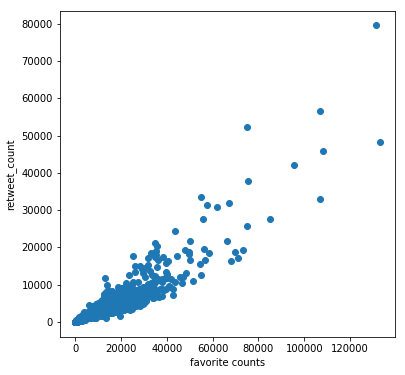

In [161]:
#scatter plot to check the relationship between  favorite_count and retweet_count
plt.figure(figsize=(6,6))
plt.scatter(df_master.favorite_count,df_master.retweet_count)
plt.xlabel('favorite counts')
plt.ylabel('retweet_count');

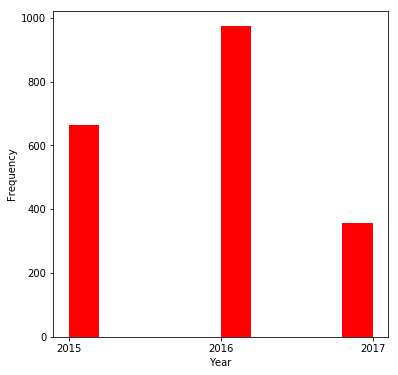

In [162]:
#Histogram for year column
plt.figure(figsize=(6,6))
df_master['year'].plot(kind='hist', color='red')
plt.xticks(range(2015,2018,1))
plt.xlabel('Year');

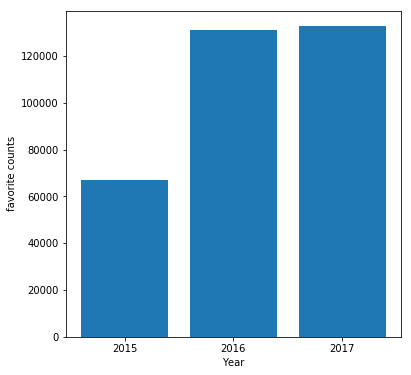

In [163]:
# barchart for year and  favorite_count
plt.figure(figsize=(6,6))
plt.bar(df_master['year'], df_master['favorite_count'])
plt.xlabel('Year')
plt.ylabel('favorite counts')
plt.xticks(range(2015,2018,1));

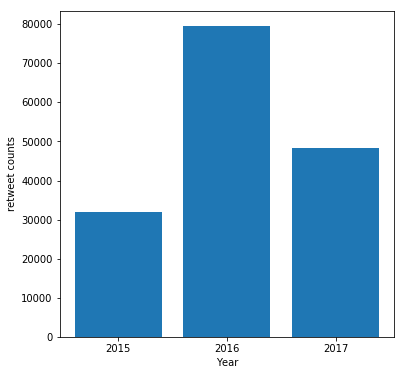

In [164]:
# barchart for year and retweet_count
plt.figure(figsize=(6,6))
plt.bar(df_master['year'], df_master['retweet_count'])
plt.xlabel('Year')
plt.ylabel('retweet counts')
plt.xticks(range(2015,2018,1));

# References

1. Udacity lessons
2. https://stackoverflow.com
3. www.askpython.com
4. https://pythonguides.com